Link to dataset:
https://data.wprdc.org/dataset/property-data-with-geographic-identifiers/resource/8eff881d-4d28-4064-83f1-30cc991cfec7
https://data.wprdc.org/datastore/dump/8eff881d-4d28-4064-83f1-30cc991cfec7

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats

#load data
#usecols=[0,25,35,68, 69,70,71,88] to include condition info
property_data = pd.read_csv("property_data_pittsburgh_wprdc.csv", 
                                       index_col="_id", usecols=[0,25,35,88], low_memory=False) # use the column named _id as the row index


In [2]:
property_data.head(10) #first 10 rows
#property_data.info() # Display the datatypes of the index and columns as well as memory usage
#property_data.describe() #summary Statistics

,CLASSDESC,SALEPRICE,NEIGHBORHOOD
_id,,,
1,RESIDENTIAL,699000.0,Central Business District
2,RESIDENTIAL,350000.0,Central Business District
3,RESIDENTIAL,265000.0,Central Business District
4,RESIDENTIAL,25550.0,Bluff
19,COMMERCIAL,0.0,Bluff
5,RESIDENTIAL,45550.0,Bluff
6,COMMERCIAL,85000.0,Bluff
7,COMMERCIAL,250000.0,Bluff
8,COMMERCIAL,113000.0,Bluff


value counts 
 Brookline              5270
Carrick                3827
Squirrel Hill South    3794
Mount Washington       3617
Beechview              3454
                       ... 
South Shore             145
Northview Heights        84
Glen Hazel               58
Allegheny Center         51
Arlington Heights         8
Name: NEIGHBORHOOD, Length: 91, dtype: int64
residential value counts: 
value counts 
 Brookline              3267
Squirrel Hill South    2596
Mount Washington       2403
Carrick                2389
Beechview              2100
                       ... 
Glen Hazel               26
Northview Heights        22
North Shore               9
South Shore               6
Arlington Heights         1
Name: NEIGHBORHOOD, Length: 89, dtype: int64


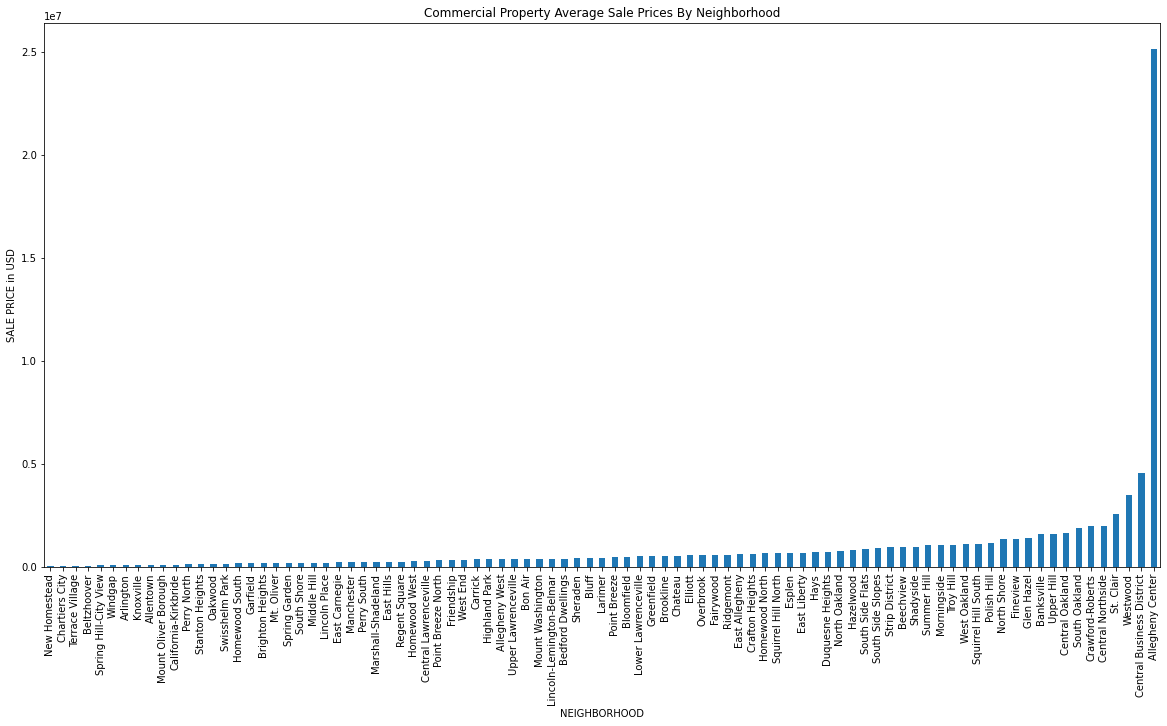

cheapest 10 Residential neighborhoods:


NEIGHBORHOOD
Bedford Dwellings    10934.263158
Homewood West        12332.396040
Beltzhoover          12551.517491
Larimer              17429.702156
Esplen               20137.903846
Homewood North       20670.992256
Hays                 22146.080292
East Hills           22655.226586
Fairywood            23853.048077
Knoxville            25365.706612
Name: SALEPRICE, dtype: float64

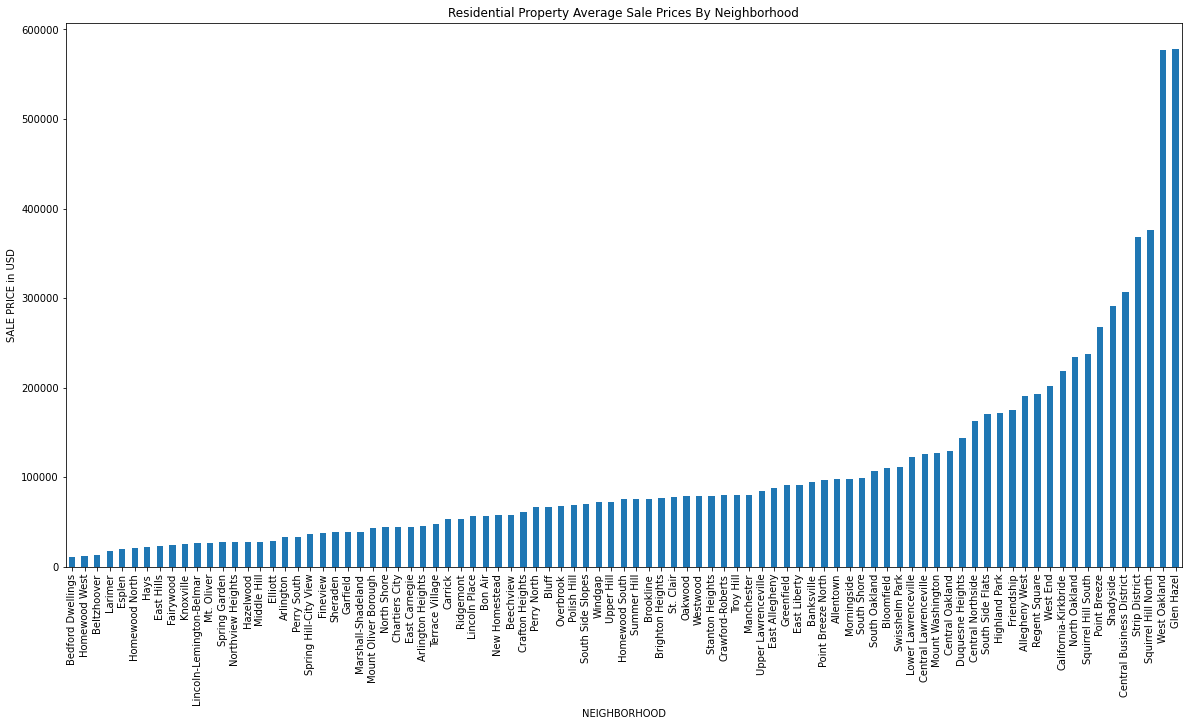

In [35]:
value_counts = property_data['NEIGHBORHOOD'].value_counts()
print("value counts \n",value_counts)

#get rid of sale prices <=50 dollars
price_mask = property_data['SALEPRICE'] <= 50 #these are the values we are removing
edited_property_data = property_data.mask(price_mask)

#remove NaN neighborhoods
edited_property_data = edited_property_data[edited_property_data['NEIGHBORHOOD'].notnull()]

#isolate the two property types we are focusing
type_commercial_mask = edited_property_data['CLASSDESC']=='COMMERCIAL'
type_residential_mask = edited_property_data['CLASSDESC']=='RESIDENTIAL'
commercial_data = edited_property_data[type_commercial_mask]
residential_data = edited_property_data[type_residential_mask]

#new value counts:
print("residential value counts: ")
value_counts = residential_data['NEIGHBORHOOD'].value_counts()
print("value counts \n",value_counts)

#commercial sorting and graph
#group by neighborhood
commercial_data = commercial_data.groupby('NEIGHBORHOOD').mean()

#sort ascending
commercial_data_sorted = commercial_data['SALEPRICE'].sort_values(ascending=True)
#bar graph
plt.title("Commercial Property Average Sale Prices By Neighborhood")
plt.ylabel("SALE PRICE in USD")
commercial_bar_plot = commercial_data_sorted.plot.bar(figsize = (20,10))
plt.show()

#residential sorting and graph
#group by neighborhood
residential_data = residential_data.groupby('NEIGHBORHOOD').mean()

#sort ascending
residential_data_sorted = residential_data['SALEPRICE'].sort_values(ascending=True)
#bar graph
plt.title("Residential Property Average Sale Prices By Neighborhood")
plt.ylabel("SALE PRICE in USD")
residential_data_sorted.plot.bar(figsize = (20,10))

#We are looking for the cheapest housing, so:
#bottom ten:
print("cheapest 10 Residential neighborhoods:")
#print(residential_data_sorted)
residential_data_sorted.head(10)


Text(0.5, 1.0, 'Commercial Property Average Sale Prices Geo Map')

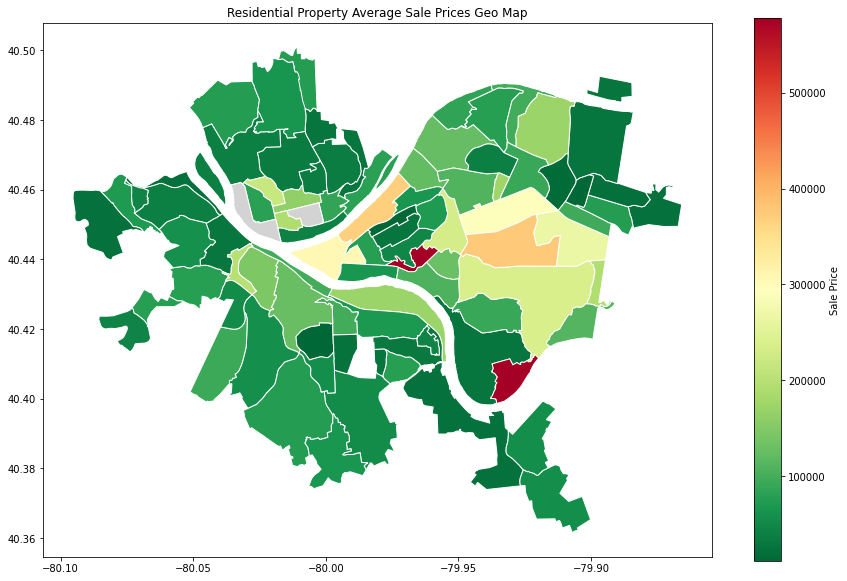

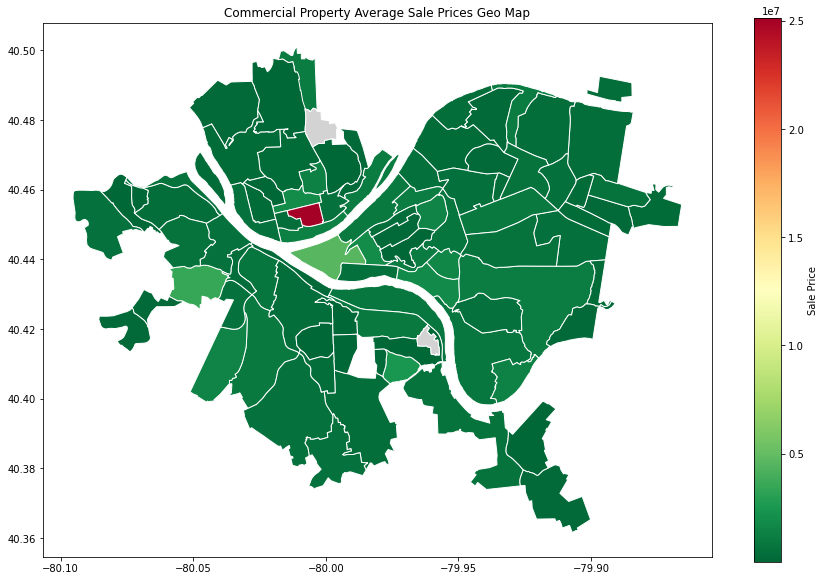

In [29]:
#Geopandas:
neighborhoods_geo = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

residential_map = neighborhoods_geo.merge(residential_data["SALEPRICE"], how='left', left_on='hood', right_on='NEIGHBORHOOD')
residential_map[['hood',"SALEPRICE",'geometry']]
residential_map.plot(column='SALEPRICE', 
                     cmap=plt.cm.get_cmap('RdYlGn').reversed(), 
                     edgecolor="white", 
                     legend=True, 
                     legend_kwds={'label': "Sale Price"}, 
                     figsize=(15, 10), 
                     missing_kwds={"color": "lightgrey"}) 
plt.title("Residential Property Average Sale Prices Geo Map")

commercial_map = neighborhoods_geo.merge(commercial_data["SALEPRICE"], how='left', left_on='hood', right_on='NEIGHBORHOOD')
commercial_map[['hood',"SALEPRICE",'geometry']]
commercial_map.plot(column='SALEPRICE', 
                    cmap=plt.cm.get_cmap('RdYlGn').reversed(), 
                    edgecolor="white", 
                    legend=True, 
                    legend_kwds={'label': "Sale Price"}, 
                    figsize=(15, 10), 
                    missing_kwds={"color": "lightgrey"}) 
plt.title("Commercial Property Average Sale Prices Geo Map")

